In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
data = np.load('/drive/My Drive/science/rnn_ep=2/ml=300__n=25.npy')
data = np.reshape(data, (2, 10000))
data.shape

(2, 10000)

In [4]:
drive.flush_and_unmount()

In [5]:
result = data[0,:]
print(result.shape)
print(result[:6])

(10000,)
[0.6073761  0.27475899 0.31369799 0.15743363 0.95735651 0.85446584]


In [6]:
result[result >= 0.5] = 1
result[result < 0.5] = 0
print(result[:6])

[1. 0. 0. 0. 1. 1.]


In [7]:
label = data[1,:]
print(label.shape)
print(label[:6])

(10000,)
[1. 0. 0. 1. 1. 0.]


In [8]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [9]:
for i in range(len(label)):
  if label[i] == 1 and result[i] == 1:
    true_positive += 1
  if label[i] == 0 and result[i] == 1:
    false_positive += 1
  if label[i] == 0 and result[i] == 0:
    true_negative += 1
  if label[i] == 1 and result[i] == 0:
    false_negative += 1

In [10]:
print(f"true_positive: {true_positive}")
print(f"true_negative: {true_negative}")
print(f"false_positive: {false_positive}")
print(f"false_negative: {false_negative}")

true_positive: 3817
true_negative: 3275
false_positive: 1747
false_negative: 1161


In [11]:
plot_data = np.array([true_positive, true_negative,
                      false_positive, false_negative])
plot_labels = ['true_positive', 'true_negative',
               'false_positive', 'false_negative']

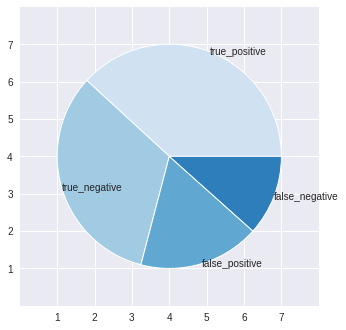

In [12]:
plt.style.use('seaborn')


# make data
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(plot_data)))

# plot
fig, ax = plt.subplots()
ax.pie(plot_data, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True,
       labels=plot_labels, labeldistance=1)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [13]:
# What proportion of positive identifications was actually correct?
precision = true_positive / (true_positive + false_positive)
print(f'precision: {precision}')

# What proportion of actual positives was identified correctly?
recall = true_positive / (true_positive + false_negative)
print(f'recall: {recall}')

precision: 0.6860172537742631
recall: 0.7667738047408598


In [14]:
accuracy = (true_positive + true_negative) / len(result)
print(f'accuracy: {accuracy * 100}%')

accuracy: 70.92%
